In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
  
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
  

    

from xgboost import XGBClassifier
from xgboost import Booster
from xgboost import DMatrix
  
from sklearn import metrics
from datetime import datetime

In [7]:
dataDF = pd.read_csv("creditcard.csv")
dataDF.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,...,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.620,0
1,0.000,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,...,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.690,0
2,1.000,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,...,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.660,0
3,1.000,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,...,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.500,0
4,2.000,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,...,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.990,0


0    284315
1       492
Name: Class, dtype: int64


<AxesSubplot:title={'center':'Class'}>

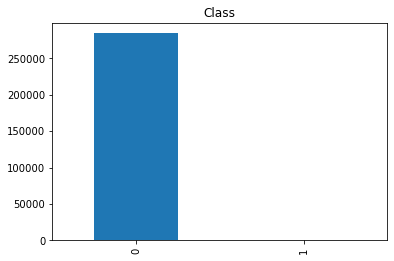

In [20]:
value_counts = dataDF["Class"].value_counts()
print(value_counts)
value_counts.plot(kind="bar", title="Class")

In [24]:
dataDF.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
count,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,...,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000
mean,94813.860,0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,...,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,88.350,0.002,12.349
std,47488.146,1.959,1.651,1.516,1.416,1.380,1.332,1.237,1.194,1.099,...,0.726,0.624,0.606,0.521,0.482,0.404,0.330,250.120,0.042,7.805
min,0.000,-56.408,-72.716,-48.326,-5.683,-113.743,-26.161,-43.557,-73.217,-13.434,...,-10.933,-44.808,-2.837,-10.295,-2.605,-22.566,-15.430,0.000,0.000,0.000
25%,54201.500,-0.920,-0.599,-0.890,-0.849,-0.692,-0.768,-0.554,-0.209,-0.643,...,-0.542,-0.162,-0.355,-0.317,-0.327,-0.071,-0.053,5.600,0.000,4.000
50%,84692.000,0.018,0.065,0.180,-0.020,-0.054,-0.274,0.040,0.022,-0.051,...,0.007,-0.011,0.041,0.017,-0.052,0.001,0.011,22.000,0.000,15.000
75%,139320.500,1.316,0.804,1.027,0.743,0.612,0.399,0.570,0.327,0.597,...,0.529,0.148,0.440,0.351,0.241,0.091,0.078,77.165,0.000,19.000
max,172792.000,2.455,22.058,9.383,16.875,34.802,73.302,120.589,20.007,15.595,...,10.503,22.528,4.585,7.520,3.517,31.612,33.848,25691.160,1.000,23.000


In [25]:
dataDF[["Amount", "Time"]].describe()

,Amount,Time
count,284807.000,284807.000
mean,88.350,94813.860
std,250.120,47488.146
min,0.000,0.000
25%,5.600,54201.500
50%,22.000,84692.000
75%,77.165,139320.500
max,25691.160,172792.000


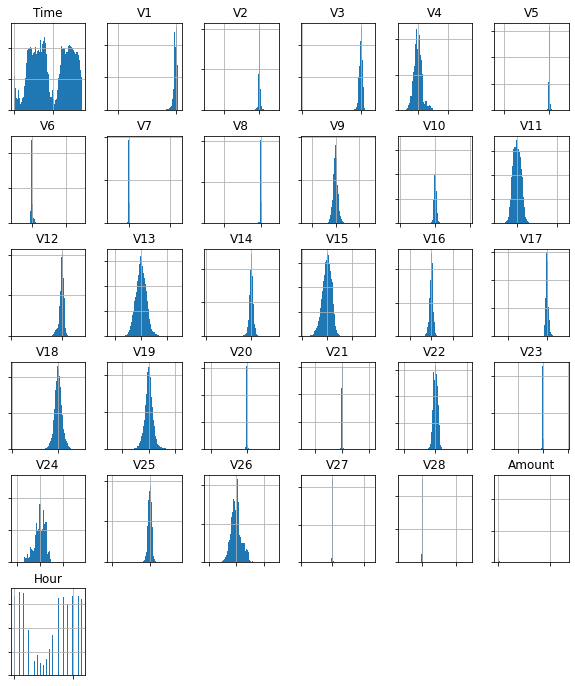

In [26]:
ax = dataDF.drop("Class", axis=1).hist(figsize=(10,12),bins=100)
for axis in ax.flatten():
    axis.set_xticklabels([])
    axis.set_yticklabels([])

### Time vs Transactions

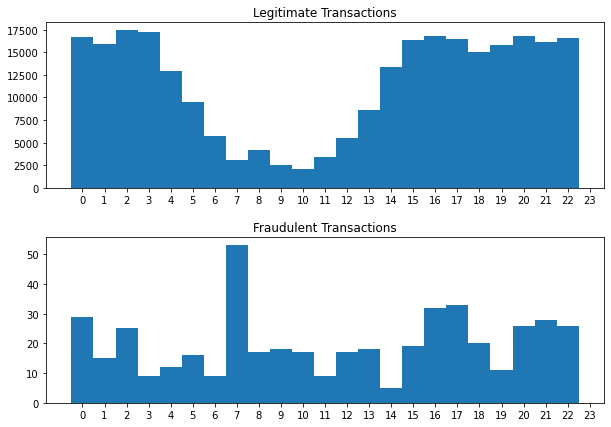

In [14]:
dataDF["Hour"] = dataDF["Time"].apply(datetime.fromtimestamp).dt.hour
fig, ax = plt.subplots(2, figsize=(10,7))
for a in ax:
    a.set_xticks(range(24))
dataDF.loc[dataDF["Class"] == 0]["Hour"].hist(bins=np.arange(24)-0.5, ax=ax[0], grid=False)
dataDF.loc[dataDF["Class"] == 1]["Hour"].hist(bins=np.arange(24)-0.5, ax=ax[1], grid=False)
ax[0].title.set_text("Legitimate Transactions")
ax[1].title.set_text("Fraudulent Transactions")
plt.subplots_adjust(hspace=0.3)

In [47]:
def compare_leg_fraud(attribute):
    leg_trS = dataDF.loc[dataDF["Class"] == 0][attribute].rename("Legit").describe()
    frd_trS = dataDF.loc[dataDF["Class"] == 1][attribute].rename("Fraud").describe()
    tr_hourDF = leg_trS.to_frame().join(frd_trS.to_frame())
    return tr_hourDF


"""Here the mean transaction amount is higher for fraudulent transactions, 
but the overall amount is significantly lower in absolute terms.""" 

compare_leg_fraud("Amount")

,Legit,Fraud
count,284315.000,492.000
mean,88.291,122.211
std,250.105,256.683
min,0.000,0.000
25%,5.650,1.000
50%,22.000,9.250
75%,77.050,105.890
max,25691.160,2125.870


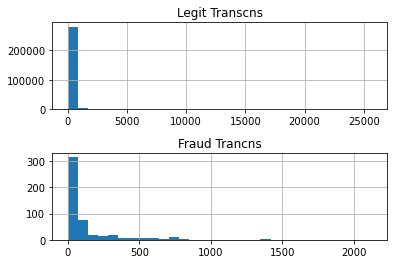

In [49]:
fig, ax = plt.subplots(2)
dataDF.loc[dataDF["Class"] == 0]["Amount"].hist(bins=30, ax=ax[0])
dataDF.loc[dataDF["Class"] == 1]["Amount"].hist(bins=30, ax=ax[1])
ax[0].title.set_text("Legit Transcns")
ax[1].title.set_text("Fraud Trancns")
plt.subplots_adjust(hspace=0.5)

In [67]:
trainDF, testDF = train_test_split(dataDF, test_size=0.2, random_state=1234, stratify=dataDF[["Class"]])
  
tr_value_counts = trainDF["Class"].value_counts()
tst_value_counts = testDF["Class"].value_counts()

In [68]:
# Above we saw that Amount coulumn is not zero mean centered, so lets firstly normalise it

trainDF_norm = trainDF.copy()
testDF_norm = testDF.copy()
  
trainDF_norm["Amount"] = trainDF["Amount"].subtract(trainDF["Amount"].mean())
trainDF_norm["Hour"] = trainDF["Hour"].subtract(trainDF["Hour"].mean())
  
testDF_norm["Amount"] = testDF["Amount"].subtract(testDF["Amount"].mean())
testDF_norm["Hour"] = testDF["Hour"].subtract(testDF["Hour"].mean())
  
trainDF = trainDF_norm
testDF = testDF_norm
# testDF.head()

In [69]:
# Just Dropping the time attribute

trainDF = trainDF.drop(["Time"], axis=1)
testDF = testDF.drop(["Time"], axis=1)

# Splitting the data
X_train = trainDF.iloc[:, trainDF.columns != "Class"]
y_train = trainDF.iloc[:, trainDF.columns == "Class"]
X_test = testDF.iloc[:, testDF.columns != "Class"]
y_test = testDF.iloc[:, testDF.columns == "Class"]

X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Hour
135152,1.082,-0.075,1.395,1.373,-0.958,0.077,-0.625,0.205,0.861,-0.248,...,-0.012,0.204,0.063,0.399,0.298,-0.400,0.089,0.039,-76.750,-8.331
103706,1.013,0.188,1.615,2.594,-0.609,0.839,-0.683,0.400,-0.260,0.597,...,0.017,0.218,0.074,0.230,0.185,-0.046,0.059,0.027,-81.450,-12.331
231651,-0.701,0.090,1.540,-3.114,0.458,0.431,0.183,0.195,-1.230,-0.503,...,-0.069,-0.367,-0.449,-1.461,0.628,-0.475,0.004,0.027,-76.250,9.669
199939,-0.430,-0.595,0.676,-2.603,1.499,4.231,-1.079,1.239,-0.798,-0.003,...,-0.015,0.214,0.090,0.694,-0.698,0.592,0.158,0.166,-42.350,5.669
103404,1.296,1.011,-3.192,0.472,3.350,2.433,0.190,0.622,-0.557,-1.487,...,-0.263,-0.825,-0.245,0.675,1.011,-0.279,0.041,0.091,-83.260,-12.331


In [72]:
"""Since the data is very imbalanced, so we can do 3 things: Undersampling or Oversampling or use SMOTE
    Generally SMOTE performs better than Undersampling/oversampling by producing synthectic samples"""

X_train_smote, y_train_smote = SMOTE(random_state=1234).fit_resample(X_train, y_train)
smote_value_counts = y_train_smote["Class"].value_counts()
smote_value_counts

0    227451
1    227451
Name: Class, dtype: int64

## Model Training

In [74]:
# we are just doing the parameter hypertuning to get the best fit-parameter for XG-Boost

In [76]:
def xgboost_search(X, y, search_verbose=1):
     
    params = {
        "gamma":[0.5, 1, 1.5, 2, 5],
        "max_depth":[3,4,5,6],
        "min_child_weight": [100],
        "subsample": [0.6, 0.8, 1.0],
        "colsample_bytree": [0.6, 0.8, 1.0],
        "learning_rate": [0.1, 0.01, 0.001]
    }
     
    xgb = XGBClassifier(objective="binary:logistic", eval_metric="auc", use_label_encoder=False)
  
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=1234)
     
    grid_search = GridSearchCV(estimator=xgb, param_grid=params, scoring="roc_auc", n_jobs=1, cv=skf.split(X,y), verbose=search_verbose)
  
    grid_search.fit(X, y)
  
    print("Best estimator: ")
    print(grid_search.best_estimator_)
    print("Parameters: ", grid_search.best_params_) 
    print("Highest AUC: %.2f" % grid_search.best_score_)
     
    return grid_search.best_params_

rows = random.sample(np.arange(0,len(X_train_smote.index)).tolist(), 5000)
model_params = xgboost_search(X_train_smote.iloc[rows,], y_train_smote.iloc[rows,])

Fitting 3 folds for each of 540 candidates, totalling 1620 fits
Best estimator: 
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, eval_metric='auc',
              gamma=0.5, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=4, min_child_weight=100, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1.0, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)
Parameters:  {'colsample_bytree': 0.6, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 100, 'subsample': 1.0}
Highest AUC: 0.99


In [78]:
"""Now that we have the set of parameters that produces the highest score,
we can use them to train a model on the complete oversampled training set."""

model = XGBClassifier(objective="binary:logistic", eval_metric="auc", use_label_encoder=False)
model.set_params(**model_params)
model.fit(X_train_smote, y_train_smote)
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, eval_metric='auc',
              gamma=1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=4, min_child_weight=100,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1.0, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, eval_metric='auc',
              gamma=1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=4, min_child_weight=100, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1.0, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

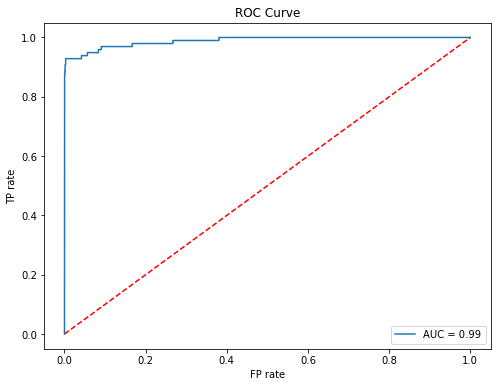

In [79]:
y_pred = model.predict_proba(X_test)[:,1]
fp_r, tp_r, t = metrics.roc_curve(y_test, y_pred)
auc = metrics.auc(fp_r, tp_r)
  
plt.figure(figsize=(8, 6))
  
plt.plot(fp_r, tp_r, label="AUC = %.2f" % auc)
plt.plot([0,1],[0,1],"r--")
  
plt.ylabel("TP rate")
plt.xlabel("FP rate")
  
plt.legend(loc=4)
plt.title("ROC Curve")
plt.show()